In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
dataset = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(dataset.shape)
dataset.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [31]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [32]:
dataset.isna().sum().sum()

0

In [33]:
dataset.duplicated().sum()

0

In [38]:
cat_col_names = []
num_col_names = []

for col in dataset.columns:
    if dataset[col].dtype == 'object':
        cat_col_names.append(col)
    else:
        num_col_names.append(col)

print(cat_col_names)
print(num_col_names)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [35]:
for col in cat_col_names:
    print(col, '({})'.format(dataset[col].nunique()), ":")
    print(dataset[col].value_counts())
    print()
    print()

Attrition (2) :
No     1233
Yes     237
Name: Attrition, dtype: int64


BusinessTravel (3) :
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Department (3) :
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


EducationField (6) :
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Gender (2) :
Male      882
Female    588
Name: Gender, dtype: int64


JobRole (9) :
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


MaritalStatus (3) :
Married     673
Sin

In [39]:
cat_col_names.remove('Over18')
print(cat_col_names)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [10]:
dataset[num_col_names[:9]].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000


In [15]:
dataset[num_col_names[9:17]].describe()

,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245
std,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209
min,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000
25%,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000
50%,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000
75%,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000
max,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000


In [19]:
dataset[num_col_names[17:-2]].describe()

,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
count,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252
std,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137
min,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000
50%,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000
75%,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000
max,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000


In [20]:
dataset[num_col_names[-2:]].describe()

,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000
mean,2.187755,4.123129
std,3.222430,3.568136
min,0.000000,0.000000
25%,0.000000,2.000000
50%,1.000000,3.000000
75%,3.000000,7.000000
max,15.000000,17.000000


In [43]:
num_col_names.remove('StandardHours')
num_col_names.remove('EmployeeCount')

In [44]:
ord_col_names = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel']
cont_col_names = list(set(num_col_names)-set(ord_col_names))

print(ord_col_names)
print(cont_col_names)


['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel']
['MonthlyRate', 'EmployeeNumber', 'HourlyRate', 'YearsWithCurrManager', 'DailyRate', 'DistanceFromHome', 'YearsAtCompany', 'StockOptionLevel', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'Age', 'MonthlyIncome', 'NumCompaniesWorked', 'TrainingTimesLastYear', 'PercentSalaryHike', 'TotalWorkingYears']


In [52]:
len(list(set(num_col_names).union(set(cat_col_names))))

32

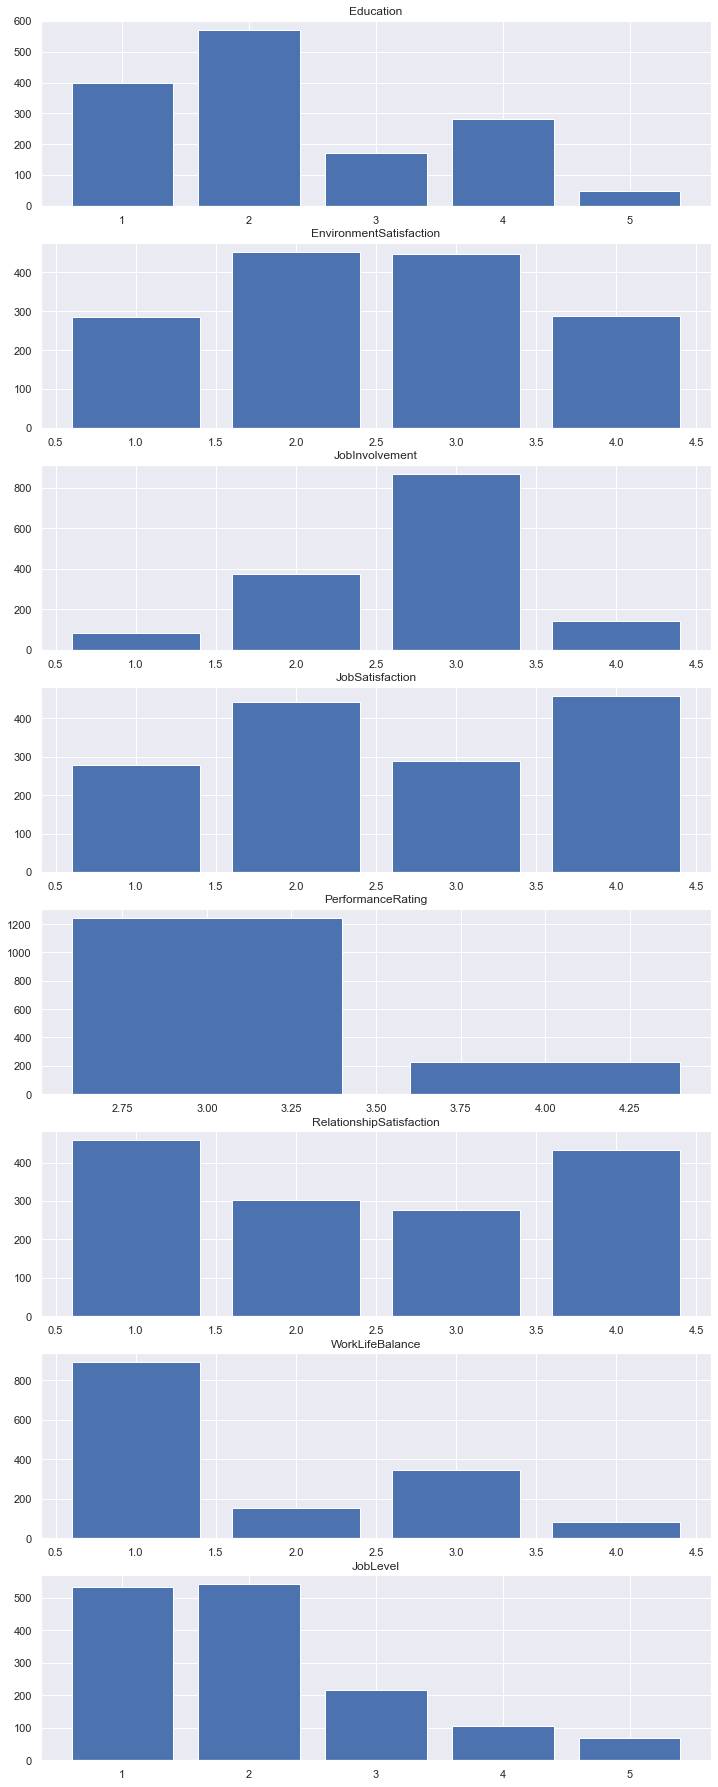

In [45]:
fig, ax = plt.subplots(len(ord_col_names))
fig.set_size_inches(12, len(ord_col_names)*4)

i=0

for col in ord_col_names:
    ax[i].bar(dataset[col].unique(), dataset[col].value_counts())
    ax[i].set_title(col)
    
    i = i+1
    
plt.savefig('img/Ordinal_Encoded_Histograms.png')
plt.show()

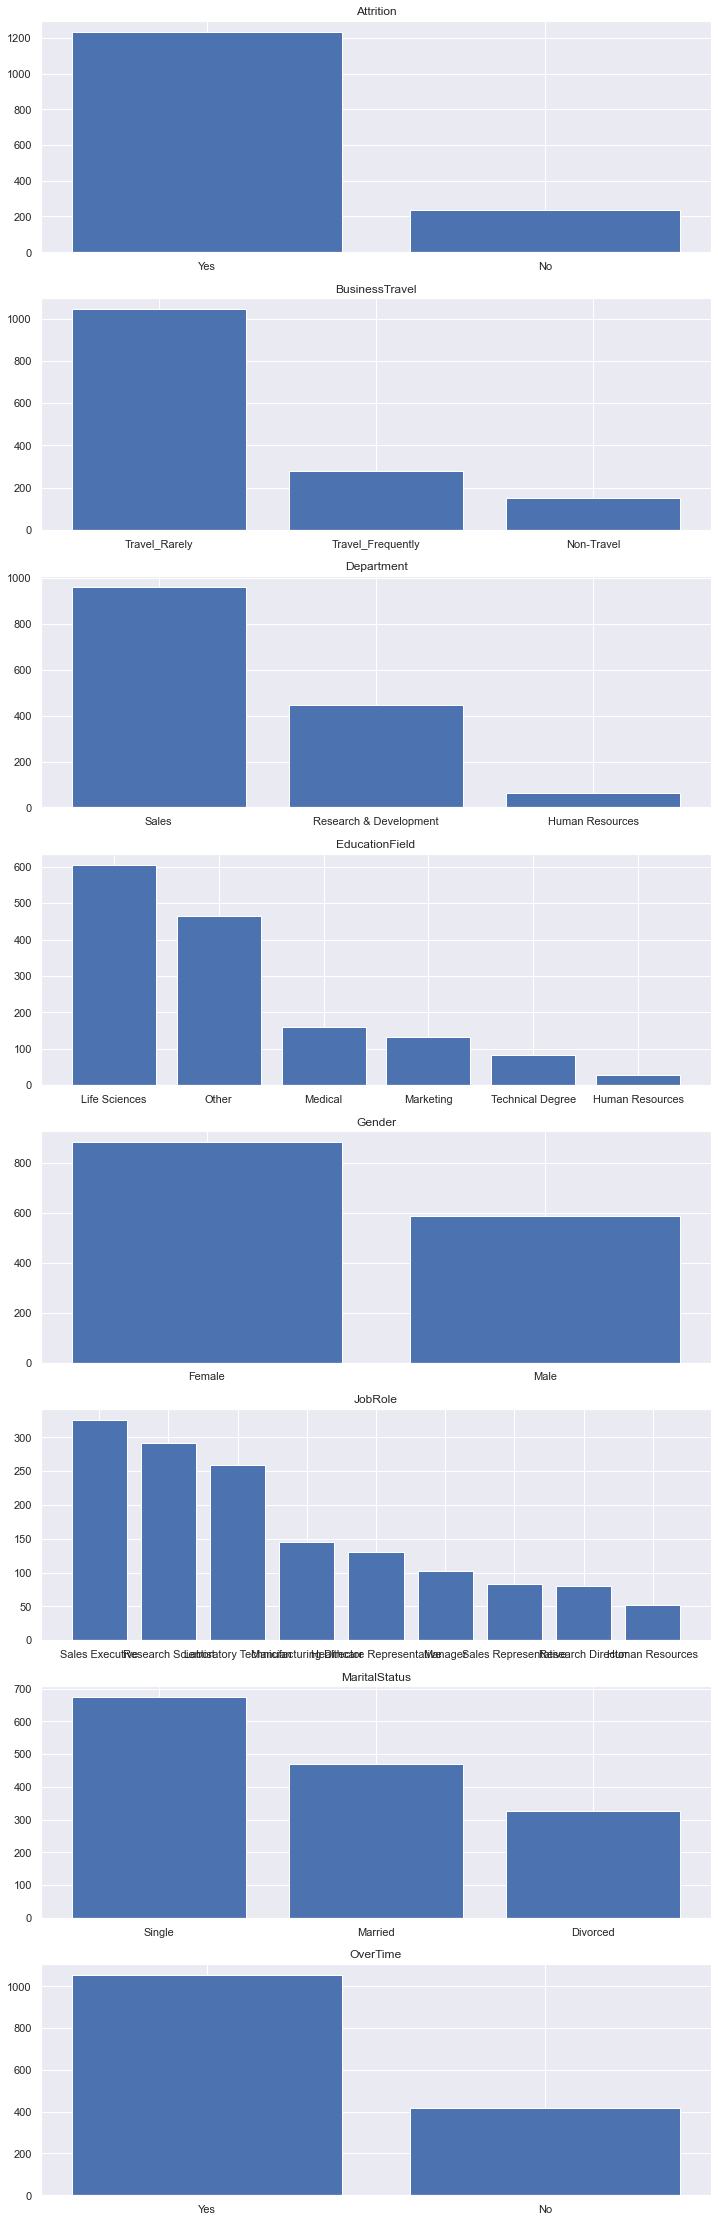

In [47]:
fig, ax = plt.subplots(len(cat_col_names))
fig.set_size_inches(12, len(cat_col_names)*5)

i=0

for col in cat_col_names:
    ax[i].bar(dataset[col].unique(), dataset[col].value_counts())
    ax[i].set_title(col)
    
    i = i+1

plt.savefig('img/Categorical_Histograms.png')
plt.show()

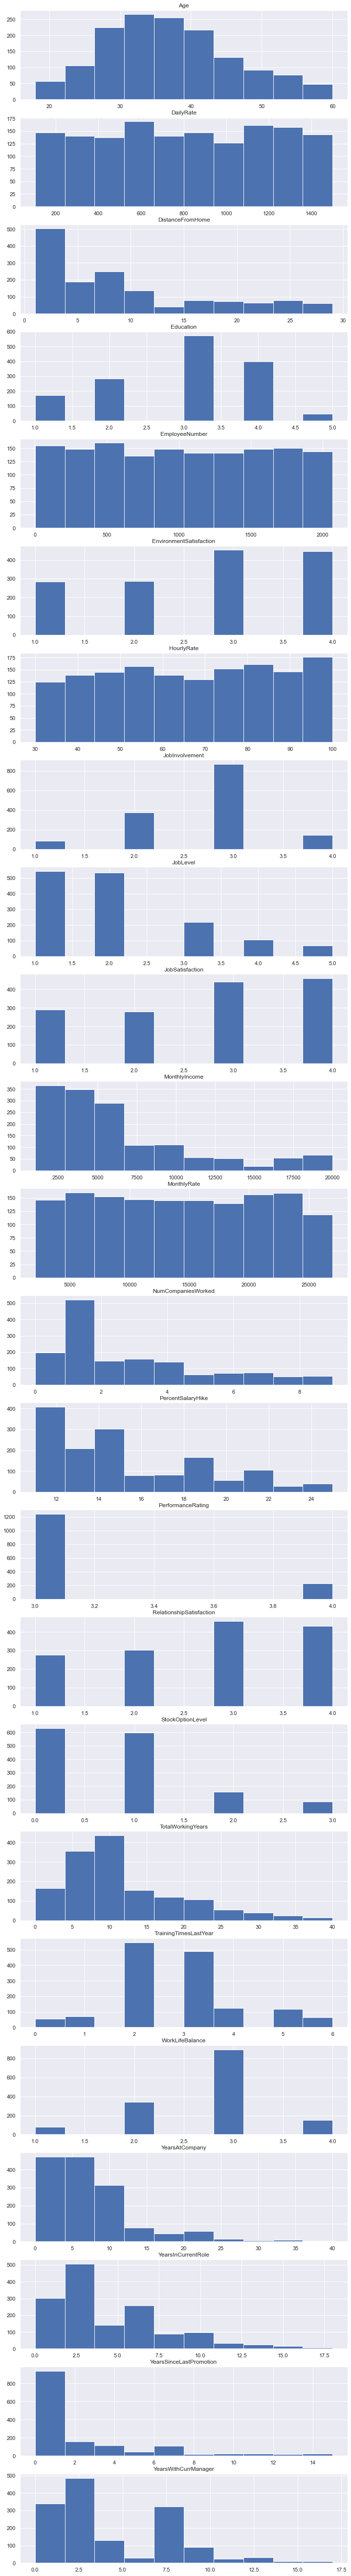

In [48]:
fig, ax = plt.subplots(len(num_col_names))
fig.set_size_inches(12, len(num_col_names)*4)

i=0

for col in num_col_names:
    ax[i].hist(dataset[col])
    ax[i].set_title(col)
    
    i = i+1

plt.savefig('img/Continuous_Histograms.png')
plt.show()

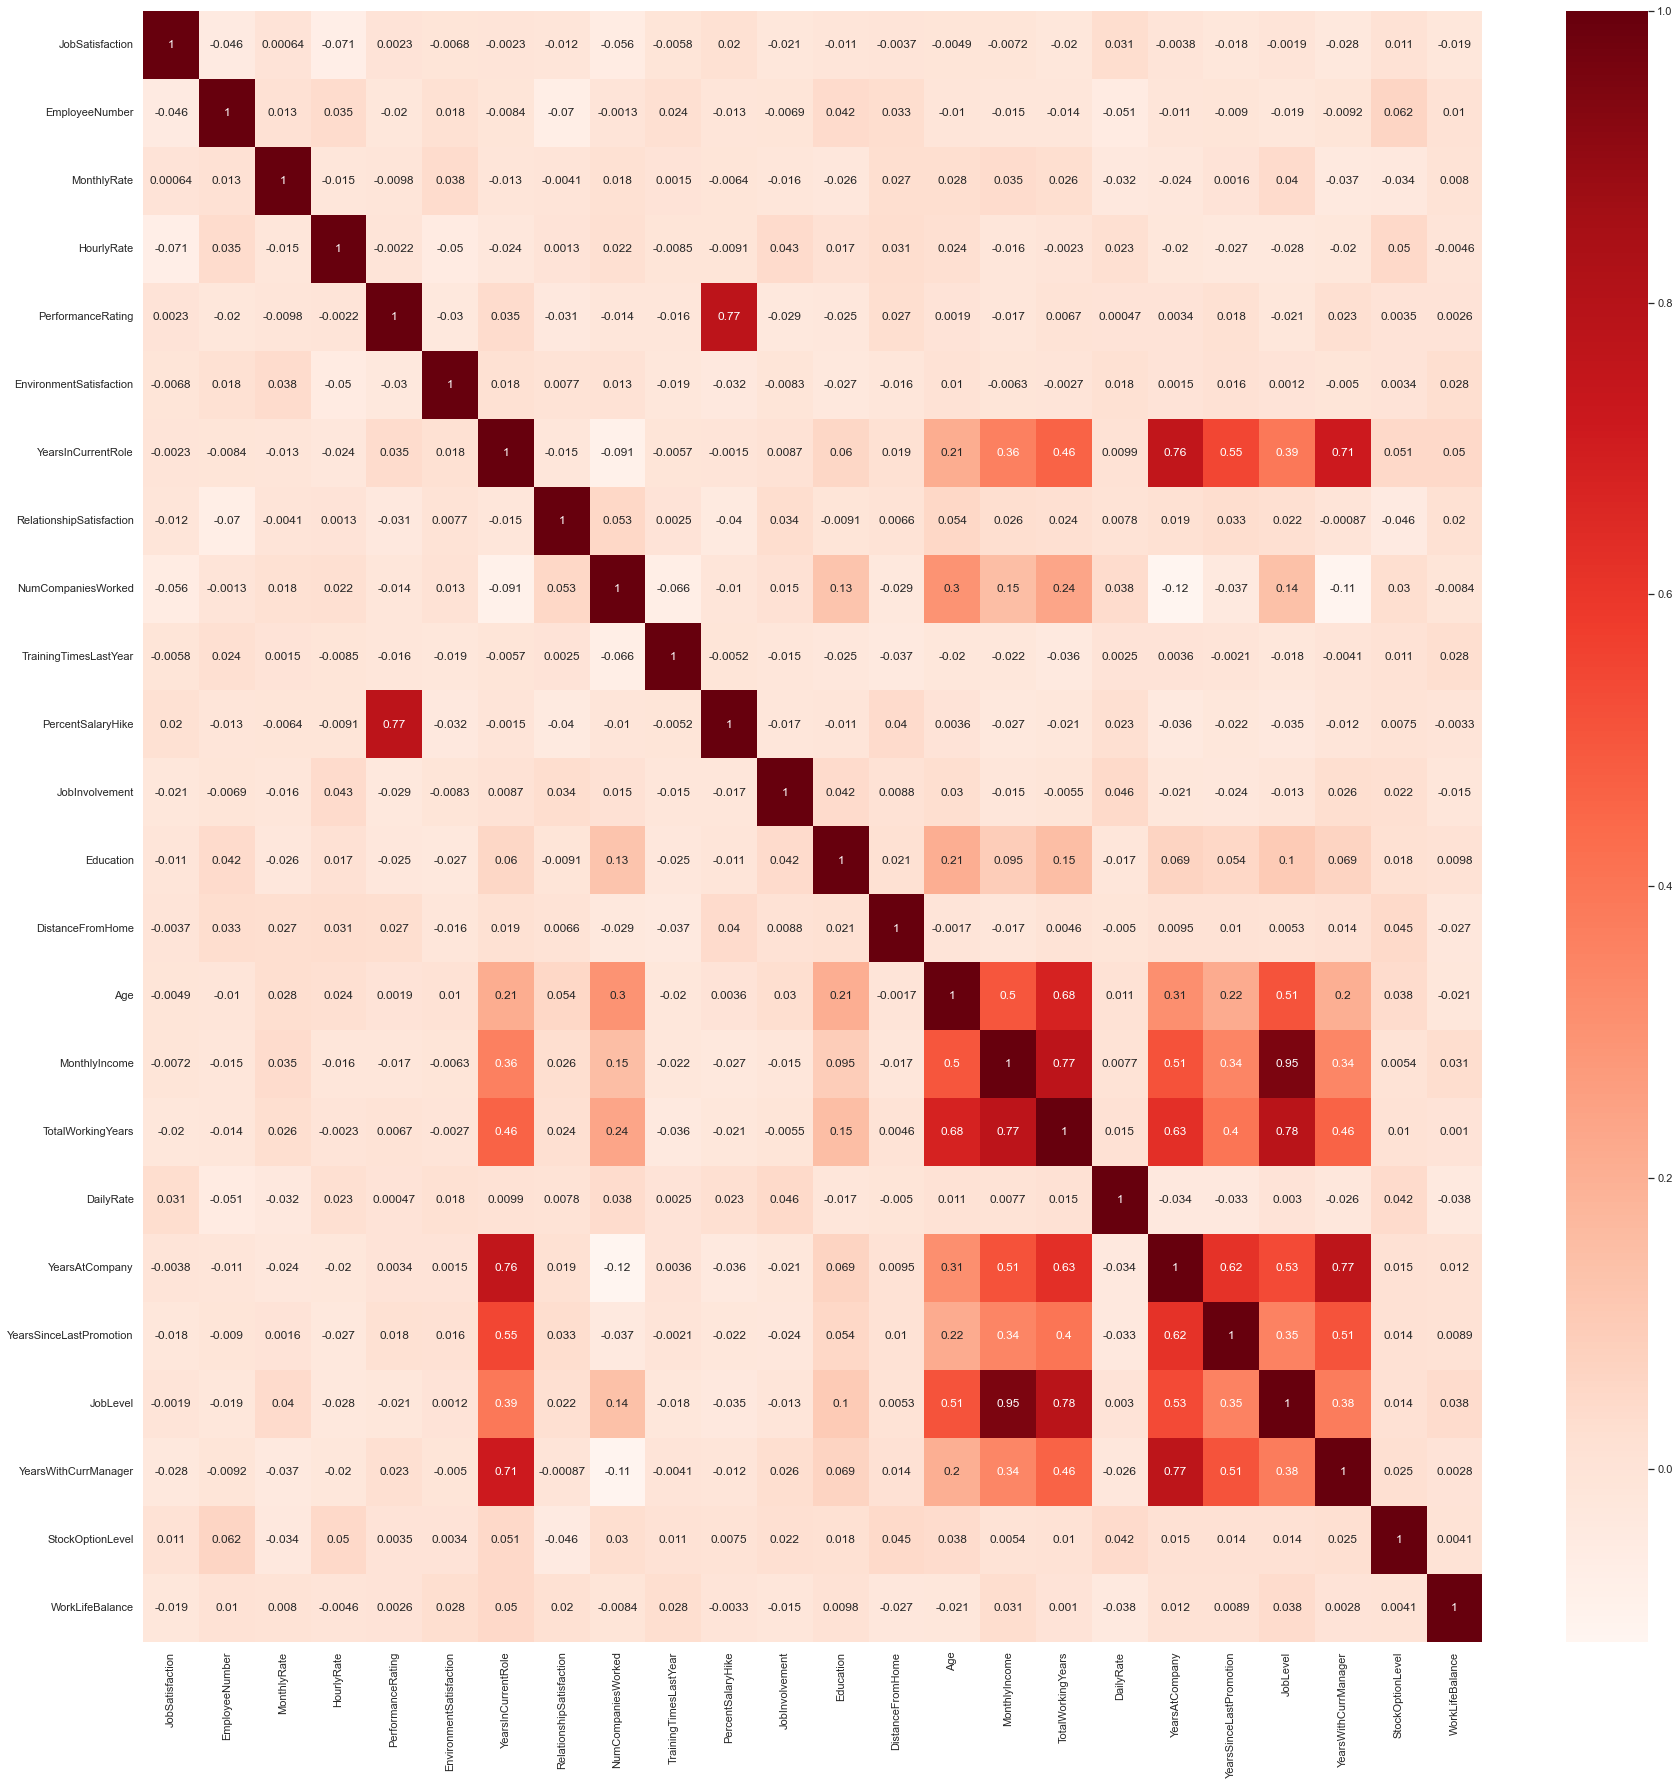

In [49]:
corr = dataset[list(set(dataset.columns)-set(['EmployeeCount', 'StandardHours']))].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Reds')
sns.set(rc={'figure.figsize': (30,30)})
plt.savefig('img/Heatmap.png')


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()